In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from scipy.stats import rankdata, zscore
import os
import joblib
from pygeneconverter import ensembl_to_hugo
import tensorflow as tf

In [4]:
model = tf.keras.models.load_model('/data1/Projects/Hallmark/hallmark_model.keras')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 9326)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │    596,928 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 16)        │      1,040 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         17 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 1)         │         17 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 1)         │         17 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         17 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │         17 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 1)         │         17 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         17 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 1)         │         17 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1)         │         17 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1)         │         17 │ dense_19[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,822,496 (6.95 MB)

 Trainable params: 607,498 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,214,998 (4.63 MB)

In [5]:
scaler = joblib.load('/data1/Projects/Hallmark/hallmark_scaler.joblib')
scaler

StandardScaler()

In [6]:
with open('/data1/Projects/Hallmark/hallmark_feature.txt', 'r') as file:
    feature_name = file.read().splitlines()
len(feature_name)

9326

In [7]:
hall_list = ['AIM', 'DCE', 'EGS', 'GIM', 'RCD', 'SPS', 'AID', 'IA', 'ERI', 'TPI']

# Cosgrove2022

Paper Link - https://www.nature.com/articles/s41467-022-27987-5

Data Link - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE184869

In [8]:
df1 = pd.read_csv('GSE184869.csv', index_col=(0))
df1 = df1.loc[:, df1.columns.str.contains('M')]
df1_gene = ensembl_to_hugo(df1.index).set_index('ENSEMBL_ID')
df1_gene = df1_gene[['HGNC_ID']]
df1 = pd.concat([df1_gene, df1], axis=1).dropna().set_index('HGNC_ID')
df1

,1M_RCS,BM12,BM17,BM19-2,2M_RCS,BM25,BM29,3M_RCS,4M_RCS,BM47,...,MAYO_BM_5,MAYO_BP_5,MAYO_BM_6,MAYO_BP_6,MAYO_BM_7,MAYO_BP_7,MAYO_BM_8,MAYO_BP_8,MAYO_BM_9,MAYO_BP_9
HGNC_ID,,,,,,,,,,,,,,,,,,,,,
SAMD11,0.414993,0.502181,3.142563,1.197622,3.426190,0.566837,0.193383,1.991076,3.655134,3.085600,...,3.410580,2.930496,0.350731,0.900881,1.228195,2.197803,1.953606,1.920986,0.788285,0.558962
NOC2L,5.881277,6.821574,6.772739,4.908847,6.851050,5.296165,5.249831,5.309623,6.295547,6.382747,...,6.521494,6.591549,4.195521,4.995603,6.188002,4.781670,4.800095,4.684119,6.049727,5.422373
KLHL17,1.661512,1.380979,2.761026,2.242559,2.776405,1.918379,0.936838,1.910523,3.145500,2.040222,...,2.234379,1.714154,1.192681,1.308786,1.681138,1.653331,1.708632,1.646986,1.522407,1.984599
PLEKHN1,1.514703,2.168161,2.998223,1.785397,2.523230,1.644374,2.329553,1.902160,4.606703,2.249369,...,2.331073,2.200707,0.730365,1.436769,1.400179,1.583985,2.319120,2.015889,1.223063,1.727329
C1orf170,0.848696,0.849814,1.773633,0.552209,1.434689,0.878921,1.108431,0.987179,1.906153,1.121227,...,1.282115,1.985056,0.249108,0.456029,1.048683,0.000010,0.864239,0.433421,4.813928,1.100722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRC1,6.182024,7.788141,5.542861,5.865007,5.320424,7.603245,6.024114,7.952441,5.093075,7.460290,...,7.196550,8.961064,7.832273,9.355210,6.356773,9.373861,7.804202,7.622606,5.202127,7.471992
AC073464.10,3.528098,3.799296,3.055302,4.849511,4.499066,5.676378,2.692325,3.472661,5.599033,4.633060,...,6.138779,6.655007,5.934009,6.161589,3.819307,0.774672,7.336217,5.164097,5.139849,3.945545
TBC1D3G,0.000010,0.000010,6.024517,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.067599,0.086570,3.630264,0.060720,0.144606,0.471852,0.061770,0.047708,0.283632,0.066432


In [9]:
df1_1 = df1.T
df1_1 = df1_1.loc[:, ~df1_1.columns.duplicated(keep='first')]
df1_1 = df1_1.reindex(columns = feature_name, fill_value = 0).fillna(0)
df1_1_index = df1_1.index
df1_1 = rankdata(df1_1 * -1, axis=1, method='average')
df1_1 = np.log2(df1_1)
df1_1 = scaler.transform(df1_1)
df1_1

array([[ 0.63908964,  0.27326632,  0.22205149, ...,  1.2457235 ,
         2.24599382, -0.97929993],
       [ 0.64379985, -0.25011695,  0.13661281, ...,  1.40126474,
         2.45025768, -2.62960741],
       [ 0.10620129,  0.29515819,  0.58565761, ...,  1.30645902,
         2.01582403,  0.32391002],
       ...,
       [ 0.17542306,  0.52037614,  0.31325702, ...,  1.49621004,
         2.4810038 , -1.54299811],
       [-0.09122604, -0.27937232,  0.23068827, ..., -0.67304707,
         1.8713292 , -1.32400153],
       [-0.00815913, -0.01380834,  0.03644752, ...,  0.81295878,
         2.49079449, -0.77517311]])

In [11]:
df1_1_pred = model.predict(df1_1)
df1_1_pred_df = pd.DataFrame()

for task_id in range(10):
    pred = np.array(df1_1_pred[task_id]).flatten()
    df1_1_pred_df[f'task_{task_id}'] = pred

df1_1_pred_df.columns = hall_list
df1_1_pred_df.index = df1_1_index
df1_1_pred_df

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI
1M_RCS,0.999971,0.999987,0.999859,0.999932,0.999977,1.000000,0.999711,0.999941,1.000000,0.999976
BM12,0.999999,0.999999,0.999999,0.999978,0.999999,1.000000,0.999937,0.999924,1.000000,1.000000
BM17,0.596527,0.407400,0.918977,0.636853,0.172715,0.776191,0.050532,0.346854,0.990455,0.500544
BM19-2,0.999988,0.999998,0.999994,0.999967,0.999939,1.000000,0.999753,0.999985,1.000000,0.999999
2M_RCS,0.999865,0.999807,0.999843,0.999934,0.998636,0.999996,0.999235,0.999918,0.999999,0.999984
...,...,...,...,...,...,...,...,...,...,...
MAYO_BP_7,0.999001,0.999564,0.978896,0.708576,0.914597,0.999969,0.954401,0.999888,0.887078,0.999861
MAYO_BM_8,0.033966,0.101515,0.008597,0.022220,0.015108,0.114248,0.001930,0.036516,0.203903,0.253046
MAYO_BP_8,0.000084,0.000037,0.000004,0.000034,0.000127,0.000265,0.000130,0.000942,0.001032,0.000923
MAYO_BM_9,0.999912,0.999858,0.999454,0.999809,0.999106,0.999999,0.999219,0.999600,1.000000,0.999985


In [12]:
df1_1_pred_df[['AIM']].to_csv('Cosgrove2022_pred.csv')

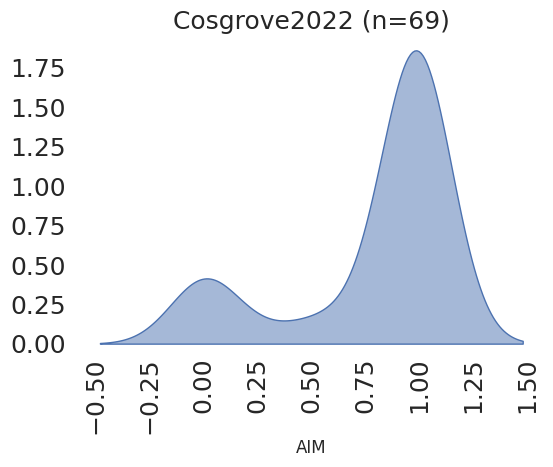

In [49]:
sns.set_theme(style="white")
plt.figure(figsize=(6, 4))

sns.kdeplot(df1_1_pred_df['AIM'], fill=True, alpha=0.5, linewidth=1)
# plt.xlabel("Predicted Probability", fontsize=16, labelpad=10)
plt.ylabel("", fontsize=16, labelpad=10)
plt.title("Cosgrove2022 (n=69)", fontsize=18, pad=5)

plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)

sns.despine(left=True, bottom=True)
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.savefig('Cosgrove2022_kde.png', dpi=1200, bbox_inches='tight')
plt.show()

# Varešlija2019

Paper Link - https://academic.oup.com/jnci/article/111/4/388/5046632

Data Link - https://github.com/npriedig/jnci_2018/blob/master/brainMetPairs.salmon.cts.txt

In [13]:
df2 = pd.read_csv('brainMetPairs.salmon.cts.txt', sep='\t', index_col=0)
df2 = df2.loc[:, df2.columns.str.split('_').str[0].str.contains('P', na=False)]
df2_gene = ensembl_to_hugo(df2.index).set_index('ENSEMBL_ID')
df2_gene = df2_gene[['HGNC_ID']]
df2 = pd.concat([df2_gene, df2], axis=1).dropna().set_index('HGNC_ID')
df2

,1P_RCS,2P_RCS,3P_RCS,4P_RCS,5P_RCS,6P_RCS,7P_RCS,6P_Pitt,7P_Pitt,12P_Pitt,...,25P_Pitt,29P_Pitt,47P_Pitt,51P_Pitt,52P_Pitt,62P_Pitt,64P_Pitt,68P_Pitt,71P_Pitt,72P_Pitt
HGNC_ID,,,,,,,,,,,,,,,,,,,,,
DDX11L1,62,5,146,0,325,410,134,448,11,66,...,25,97,410,139,25,92,278,28,78,294
WASH7P,2554,319,4848,1098,4205,9506,4925,8307,2404,2384,...,2925,3207,3930,1792,1102,2617,1033,2316,2070,5657
MIR1302-11,6,0,0,4,20,3,4,29,0,22,...,10,12,0,2,23,2,21,0,2,0
FAM138A,0,6,0,5,0,0,2,0,8,5,...,0,0,0,12,0,0,6,0,3,0
OR4G4P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WI2-2610K16.1,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
WI2-2942J8.1,0,0,0,0,1,2,0,1,3,0,...,2,0,0,0,0,0,1,0,0,2
XX-CR54.3,0,1,0,0,26,1,0,5,0,0,...,0,3,0,0,0,1,2,0,4,3


In [14]:
df2_1 = df2.T
df2_1 = df2_1.loc[:, ~df2_1.columns.duplicated(keep='first')]
df2_1 = df2_1.reindex(columns = feature_name, fill_value = 0).fillna(0)
df2_1_index = df2_1.index
df2_1 = rankdata(df2_1 * -1, axis=1, method='average')
df2_1 = np.log2(df2_1)
df2_1 = scaler.transform(df2_1)
df2_1

array([[ 0.27853356,  0.28240905,  0.5885177 , ...,  1.29487966,
         2.3269509 , -3.16030817],
       [ 0.6427536 ,  0.2387749 ,  0.60712317, ...,  1.43683031,
         2.5173189 , -0.11077306],
       [-0.05630568,  0.17444362,  0.45450001, ...,  1.22479129,
         2.33790065, -0.02375172],
       ...,
       [ 0.40192155,  0.34608336,  0.33051659, ...,  0.84683342,
         2.33862068, -2.78323003],
       [ 0.29935898, -0.38295251,  0.60429351, ...,  1.2697907 ,
         2.5251503 , -3.054702  ],
       [ 0.05788337,  0.86809198,  0.33397813, ...,  1.42580496,
         2.15208646,  0.11331737]])

In [15]:
df2_1_pred = model.predict(df2_1)
df2_1_pred_df = pd.DataFrame()

for task_id in range(10):
    pred = np.array(df2_1_pred[task_id]).flatten()
    df2_1_pred_df[f'task_{task_id}'] = pred

df2_1_pred_df.columns = hall_list
df2_1_pred_df.index = df2_1_index
df2_1_pred_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,AIM,DCE,EGS,GIM,RCD,SPS,AID,IA,ERI,TPI
1P_RCS,0.663103,5.287467e-02,4.300584e-03,3.925890e-02,0.019203,9.023839e-01,0.004723,0.515299,3.575529e-01,0.141096
2P_RCS,0.002727,2.253730e-05,6.835165e-05,1.511239e-04,0.000092,1.983647e-03,0.000321,0.002892,7.152897e-03,0.001248
3P_RCS,0.991194,9.900652e-01,5.040016e-01,9.702987e-01,0.730683,9.999567e-01,0.439509,0.995247,9.997804e-01,0.994003
4P_RCS,0.992439,9.695385e-01,6.612220e-01,6.140383e-01,0.685726,9.999471e-01,0.351357,0.914473,9.997885e-01,0.989857
5P_RCS,0.759908,8.426383e-01,1.689790e-01,3.427469e-02,0.096944,9.979976e-01,0.012344,0.672316,7.485620e-01,0.721905
6P_RCS,0.000025,2.096097e-07,8.379883e-07,1.559767e-06,0.000102,1.834478e-06,0.000015,0.000086,7.927333e-06,0.000044
7P_RCS,0.999264,9.998245e-01,9.984739e-01,9.972582e-01,0.996463,9.999982e-01,0.961691,0.998888,9.999769e-01,0.999856
6P_Pitt,0.996901,9.686652e-01,9.209752e-01,8.090519e-01,0.279477,9.999169e-01,0.357384,0.983568,9.977025e-01,0.983203
7P_Pitt,0.999999,9.999996e-01,9.998351e-01,9.999170e-01,0.999981,1.000000e+00,0.999747,0.999998,1.000000e+00,1.000000
12P_Pitt,0.999998,9.999992e-01,9.999875e-01,9.988943e-01,0.999963,1.000000e+00,0.995852,0.999945,9.999999e-01,1.000000


In [16]:
df2_1_pred_df[['AIM']].to_csv('Varešlija2019_pred.csv')

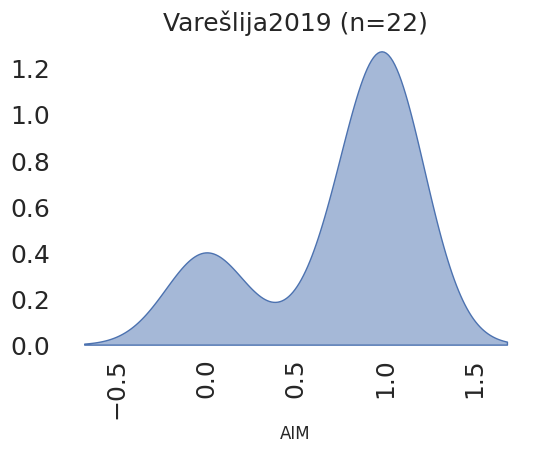

In [50]:
sns.set_theme(style="white")
plt.figure(figsize=(6, 4))

sns.kdeplot(df2_1_pred_df['AIM'], fill=True, alpha=0.5, linewidth=1)
# plt.xlabel("Predicted Probability", fontsize=16, labelpad=10)
plt.ylabel("", fontsize=16, labelpad=10)
plt.title("Varešlija2019 (n=22)", fontsize=18, pad=5)

plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18)

sns.despine(left=True, bottom=True)
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.savefig('Varešlija2019_kde.png', dpi=1200, bbox_inches='tight')
plt.show()